# Online Appendix

This online appendix accompanies the seminar paper. The purpose of this notebook is to demonstrate a potential Python implementation of the "reliabilitydiag" R package. The R package and the respective paper "Stable reliability diagrams for probabilistic classifiers" (Dimitriadis et al., 2021) are the foundation of this implementation. All interlectual propertiy rights are with the original authors. This notebook solely provides a translation from R into Python.

## Import Packages

In [10]:
import sys; print(sys.executable)

/Users/peterrumpel/opt/anaconda3/bin/python


Load the necessary functions from the python script "functions.py"

In [2]:
from functions import calc_prep
from functions import calc_Score_Decomp
from functions import plot_diagram

Load standard packages for importing the data. All other relevant packages are already loaded when importing "functions".

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data Preparation

Load the data and extract the relevant columns

In [4]:
data = pd.read_csv('precip_Niamey_2016.csv')
x = np.array(data.loc[:, 'EMOS'])
y = np.array(data.loc[:, 'obs'])

Briefly inspect the predicted scores in "x" and the observed outcomes in "y":

In [5]:
def calc_stats(var):
    mean = np.mean(var)
    std = np.std(var)
    quantiles = np.quantile(x, q = [0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])
    out = [mean, std, quantiles]
    return(out)
calc_stats(var = x)

[0.5166237176104631,
 0.11772158769858716,
 array([0.19623371, 0.22639333, 0.32802366, 0.42895672, 0.45678924,
        0.48560698, 0.57078198, 0.65623393, 0.73832135, 0.88398883,
        0.92264338])]

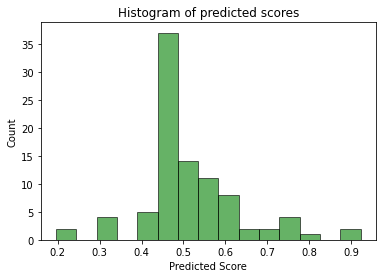

In [6]:
plt.hist(x, bins = 15, color = 'green', edgecolor = "black", alpha = 0.6)
plt.title("Histogram of predicted scores")
plt.xlabel("Predicted Score")
plt.ylabel("Count")
plt.show()

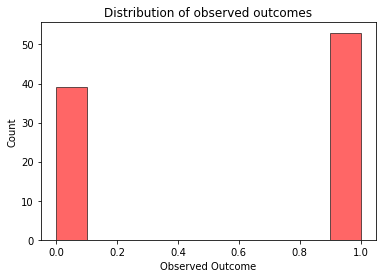

In [7]:
plt.hist(y, color = "red", edgecolor = "black", alpha = 0.6)
plt.title("Distribution of observed outcomes")
plt.xlabel("Observed Outcome")
plt.ylabel("Count")
plt.show()

## Calibration Analysis

### Isotonic Regression and Uncertainty Estimation

In a first step, all relevant calculations are performed by the function calc_prep. It fits an isotonic regression of the observed outcomes on the predicted scores. Further, it computes uncertainty areas, to assess the precision of the isotonic fit. The user can choose between a resampling approach or the usage of asymptotic theory. Both results have to be interpreted with caution, since the isotonic function has kinks and thus the result is not continuous.

In [8]:
iso_out, uncert_out = calc_prep(x = x, y = y, level = 0.1, m = 100, uncertainty = "resampling", type = "confidence")

In [9]:
iso_out.head()

,X,Y,Fit
0,0.196234,0,0.000000
1,0.229376,1,0.333333
2,0.315084,0,0.333333
3,0.315523,0,0.333333
4,0.327749,1,0.333333


In [10]:
uncert_out.head()

,Z,LB,UB
0,0.196234,0.0,0.000000
1,0.229376,0.0,0.413462
2,0.315084,0.0,0.411765
3,0.315523,0.0,0.433173
4,0.327749,0.0,0.500000


### Uncertainty Quantification: CORP Score Decomposition

In [11]:
corp = calc_Score_Decomp(iso_data = iso_out)
corp.T

,Discrimination,Miscalibration,Uncertainty,Frac Positives,Mean Brier Score,Brier Score
Value,0.03047,0.01828,0.24421,0.57609,0.23203,0.21374


### Graphical Analysis

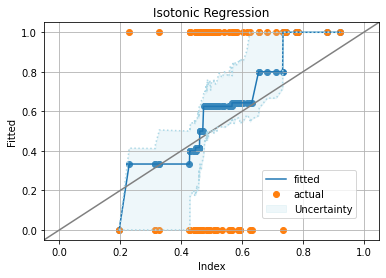

In [12]:
plot_diagram(iso_data = iso_out, uncert_data = uncert_out)

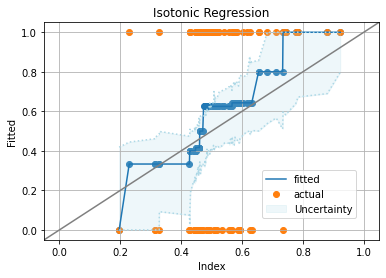

In [13]:
iso_out, uncert_out = calc_prep(x = x, y = y, level = 0.1, m = 100, uncertainty = "resampling", type = "consistency")
plot_diagram(iso_data = iso_out, uncert_data = uncert_out)

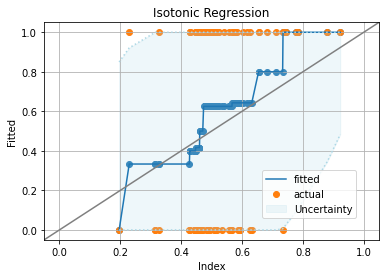

In [14]:
iso_out, uncert_out = calc_prep(x = x, y = y, level = 0.1, m = 100, uncertainty = "discrete", type = "confidence")
plot_diagram(iso_data = iso_out, uncert_data = uncert_out)

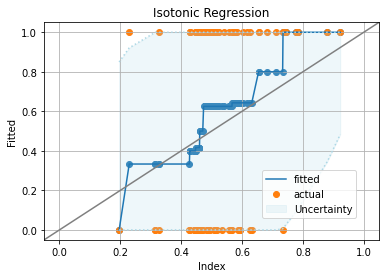

In [15]:
iso_out, uncert_out = calc_prep(x = x, y = y, level = 0.1, m = 100, uncertainty = "discrete", type = "consistency")
plot_diagram(iso_data = iso_out, uncert_data = uncert_out)